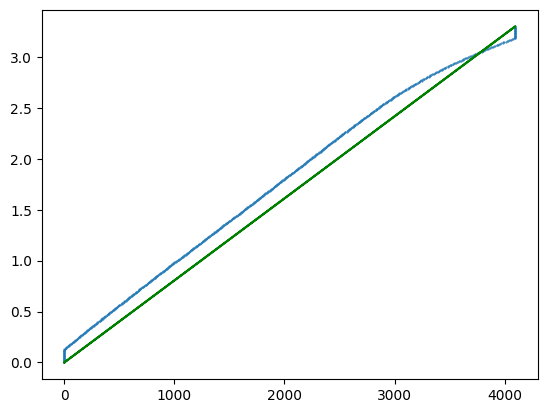

In [2]:
#Read CSV File
import pandas as pd
data = pd.read_csv("data.csv", delimiter=";")
pwm_list = data.loc[:,"PWM"].tolist()
adc_list = data.loc[:,"ADC"].tolist()

import matplotlib.pyplot as plot
voltage_level = [3.3*i/4095 for i in pwm_list]
commun_list = [3.3/4095*i for i in adc_list]
plot.plot(adc_list, commun_list, color = "green")
plot.scatter(adc_list, voltage_level, s=0.2)
plot.show()

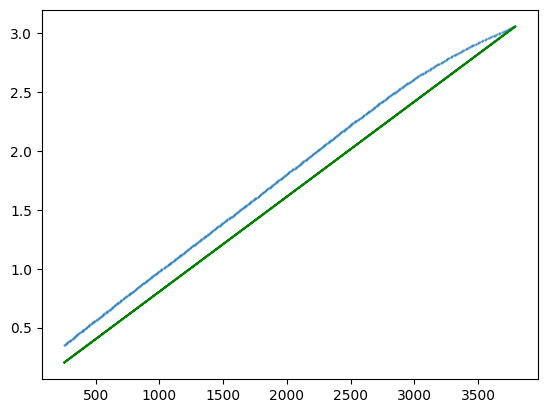

In [3]:


delete_list = []
for i in range(len(adc_list)):
    if adc_list[i] < 250 or adc_list[i] > 3800:
        delete_list.append(i)
delete_list.reverse()
for item in delete_list:
    adc_list.pop(item)
    voltage_level.pop(item)

plot.scatter(adc_list, voltage_level, s=0.5, alpha=0.5)
commun_list = [3.3/4095*i for i in adc_list]
plot.plot(adc_list, commun_list, color = "green")
plot.show()


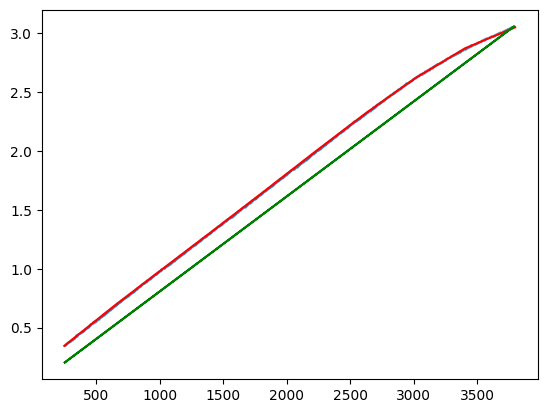

           4             3             2
-1.29e-14 x + 8.046e-11 x - 1.715e-07 x + 0.00097 x + 0.1123
-1.2899367365664596e-14
8.045726123336793e-11
-1.7149417262571565e-07
0.0009699709436244759
0.11228152405074186


In [5]:
import numpy as np

mymodel = np.poly1d(np.polyfit(adc_list, voltage_level, 4))
myline = np.linspace(250, 3800, 10)
plot.plot(myline, mymodel(myline), color="red")
plot.scatter(adc_list, voltage_level, s=0.5, alpha=0.7)

commun_list = [3.3/4095*i for i in adc_list]
plot.plot(adc_list, commun_list, color = "green")
plot.show()
print(mymodel)
for i in mymodel:
    print(i)


#def read_voltage(RAW):
